<a href="https://colab.research.google.com/github/hari2301/Flight_fair_prediction/blob/master/Flight_fair_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Importing dataset


*   view the sample of the dataset
*   check for null values
*   drop the null values







In [ ]:

train_data=pd.read_excel('flight_Data_Train.xlsx') 

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
train_data.dropna(inplace=True)
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


# EDA



*   seprate the date time hour minutes
*   remove string for the date time column





In [ ]:
#split the date and month and store in the seprate column
#dt.date gives the date 
#dt.month gives the month

train_data['Journey_Date']  =pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day
train_data['Journey_Month'] =pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.month

#drop the original column'Date_of_journey'
train_data.drop(['Date_of_Journey'], axis=1, inplace=True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [ ]:
#'Route' and 'Additional info' doesn't give any information

train_data.drop(['Route'],axis=1, inplace=True)
train_data.drop(['Additional_Info'],axis=1, inplace=True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Date,Journey_Month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3


In [ ]:
#split the 'dep_hour' and 'dep_minute' and store in the seprate column
#'dt.hour' gives the hour
#'dt.minute' givr the minute

train_data['Dep_hr']=pd.to_datetime(train_data.Dep_Time).dt.hour
train_data['Dep_min']=pd.to_datetime(train_data.Dep_Time).dt.minute

#drop the original column 'Dep_Time'
train_data.drop(['Dep_Time'],axis=1,inplace=True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Journey_Date,Journey_Month,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,13302,1,3,16,50


In [ ]:
#split the 'arr_hour' and 'arr_minute' and store in the seprate column
train_data['Arrival_hr']=pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data['Arrival_min']=pd.to_datetime(train_data.Arrival_Time).dt.minute

#drop the 'Arrival_Time' original column
train_data.drop(['Arrival_Time'],axis=1,inplace=True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Date,Journey_Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35


In [ ]:
#duration is in the string formate, split the string and get the number from it
#'Duration' column as list and store in the variable
#iterate the list and split


duration_list=list(train_data['Duration'])

for i in range(len(duration_list)):
     if len(duration_list[i].split()) !=2:                                      #if the splitted string length is not equalto '2' then check that string contains 'h' in it
            if 'h' in duration_list[i]:                          
                duration_list[i]=duration_list[i].strip() + ' 0m'               #add 0 minute at the end
            else:
                duration_list[i]="0h " + duration_list[i]                       #add 0 hour at the begining
 
duration_hour=[]
duration_minutes=[]
for i in range(len(duration_list)):
    duration_hour.append(int(duration_list[i].split(sep="h")[0]))
    duration_minutes.append(int(duration_list[i].split(sep="m")[0].split()[-1]))

In [ ]:
#split the hour and minute from the duration
train_data['Duration_hr']=duration_hour
train_data['Duration_min']=duration_minutes

#drop the duration original column
train_data.drop(['Duration'],axis=1, inplace=True)

In [ ]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Date,Journey_Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


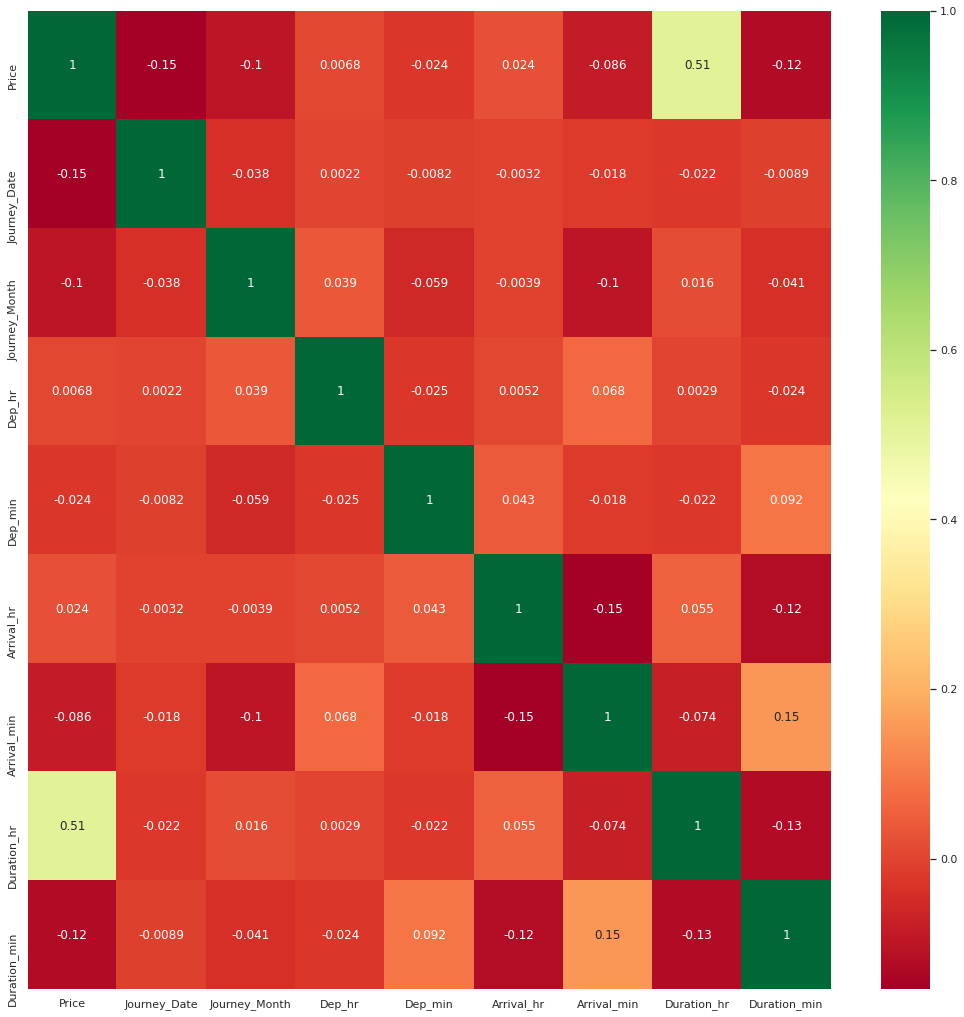

In [ ]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

# Handling categorial data


*   perform OneHotEncoding
*   split the train test set





In [ ]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
#replace the total_stips value in numbers

train_data['Total_Stops'].replace({"1 stop":"1","non-stop":"0","2 stops":"2","3 stops":"3","4 stops":"4"}, inplace=True)

In [ ]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

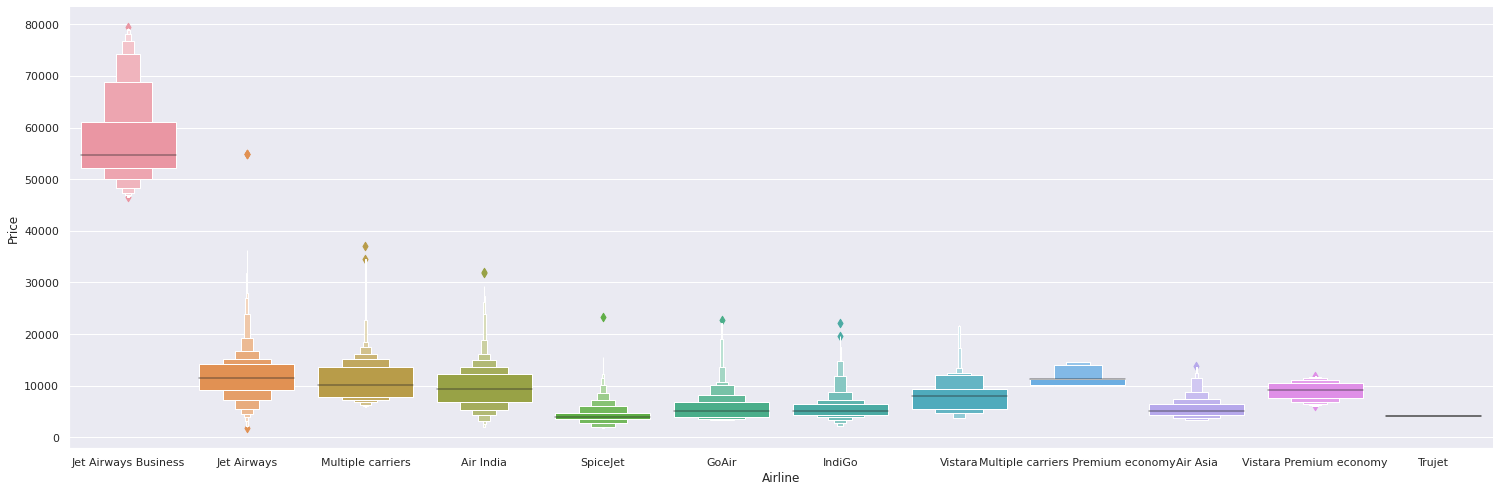

In [ ]:
#catplot for price and airline

sns.catplot(x="Airline",y="Price",data=train_data.sort_values('Price',ascending=False),kind="boxen",height=7,aspect=3)

In [ ]:
Airline=train_data['Airline']
Destination=train_data['Destination']
Source=train_data['Source']

#onhotencoding to catagorical data
#drop_first=True delete the dummies and perform the onhotencoding
Airline=pd.get_dummies(Airline, drop_first=True)
Destination=pd.get_dummies(Destination, drop_first=True)
Source=pd.get_dummies(Source, drop_first=True)

In [ ]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
#join the seperate columns to the data set
train_data=pd.concat([train_data,Airline,Destination,Source],axis=1)

In [ ]:
train_data.drop(['Airline','Destination','Source'],axis=1,inplace=True)

In [ ]:
train_data.head()

,Total_Stops,Price,Journey_Date,Journey_Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# Test_data



*   perform all the operation for the test data, that already done for train data




In [ ]:
test_data=pd.read_excel("flight_Test_set.xlsx")

test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
test_data.dropna(inplace=True)
test_data.isnull().sum()

#split the date and month and store in the seprate column
#dt.date gives the date 
#dt.month gives the month
test_data['Journey_Date']  =pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data['Journey_Month'] =pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.month
test_data.drop(['Date_of_Journey'], axis=1, inplace=True)

test_data.drop(['Route'],axis=1, inplace=True)
test_data.drop(['Additional_Info'],axis=1, inplace=True)

#split the 'dep_hour' and 'dep_minute' and store in the seprate column
#'dt.hour' gives the hour
#'dt.minute' givr the minute
test_data['Dep_hr']=pd.to_datetime(test_data.Dep_Time).dt.hour
test_data['Dep_min']=pd.to_datetime(test_data.Dep_Time).dt.minute
test_data.drop(['Dep_Time'],axis=1,inplace=True)

#split the 'arr_hour' and 'arr_minute' and store in the seprate column
test_data['Arrival_hr']=pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data['Arrival_min']=pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(['Arrival_Time'],axis=1,inplace=True)

#duration is in the string formate, split the string and get the number from it
#'Duration' column as list and store in the variable
#iterate the list and split
duration_list=list(test_data['Duration'])
for i in range(len(duration_list)):
     if len(duration_list[i].split()) !=2:
            if 'h' in duration_list[i]:
                duration_list[i]=duration_list[i].strip() + ' 0m'
            else:
                duration_list[i]="0h " + duration_list[i] 
 
duration_hour=[]
duration_minutes=[]
for i in range(len(duration_list)):
    duration_hour.append(int(duration_list[i].split(sep="h")[0]))
    duration_minutes.append(int(duration_list[i].split(sep="m")[0].split()[-1]))
 
#split the hour and minute from the duration   
test_data['Duration_hr']=duration_hour
test_data['Duration_min']=duration_minutes
test_data.drop(['Duration'],axis=1, inplace=True)

#replace the total_stips value in numbers
test_data['Total_Stops'].replace({"1 stop":"1","non-stop":"0","2 stops":"2","3 stops":"3","4 stops":"4"}, inplace=True)

Airline=test_data['Airline']
Destination=test_data['Destination']
Source=test_data['Source']

#onhotencoding to catagorical data
#drop_first=True delete the dummies and perform the onhotencoding
Airline=pd.get_dummies(Airline, drop_first=True)
Destination=pd.get_dummies(Destination, drop_first=True)
Source=pd.get_dummies(Source, drop_first=True)

#join the columns to dataset
test_data=pd.concat([test_data,Airline,Destination,Source],axis=1)

#drop the original columns
test_data.drop(['Airline','Destination','Source'],axis=1,inplace=True)

In [ ]:
test_data.head()

,Total_Stops,Journey_Date,Journey_Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Chennai,Delhi,Kolkata,Mumbai
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
#split X Y
x=train_data.drop('Price', axis=1)
y=train_data['Price']

In [ ]:
train_data.shape

(10682, 30)

# Fitting data into model



*   fit the models into randomforestregressor
*   predict the score
*   find MEAN SQUARED ERROR
*   MEAN ABSOLUTE ERROR
*   ROOT MEAN SQUARED ERROR



In [ ]:
#split train test split for X Y
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=3, test_size=0.2)

In [ ]:
#fit into model
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rfc=RandomForestRegressor()
rfc.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#predict the result
y_pred=rfc.predict(x_test)

#train score
rfc.score(x_train,y_train)

0.9549379385402759

In [ ]:
#test score
rfc.score(x_test,y_test)

0.8005387226387003

In [ ]:
print("MSE:", metrics.mean_squared_error(y_test,y_pred))
print("MAE:", metrics.median_absolute_error(y_test,y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MSE: 3933543.6086476697
MAE: 608.7193333333335
RMSE: 1983.3163158325679
